In [1]:
import numpy as np
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
import random
import math
import matplotlib.pyplot as plt
import dendropy
import csv
from dendropy.calculate import treecompare
import sys
import numpy
# numpy.set_printoptions(threshold=sys.maxsize)

Using TensorFlow backend.


# Loading Data

In [2]:
X_Input_Alignment_Data = np.load('../../ALL_DATA/499_dataset_Input_Output/X_Input_Alignment_Data.npy')
Y_Output_BN_List_Data = np.load('../../ALL_DATA/499_dataset_Input_Output/Y_Output_BN_List_Data.npy')

In [3]:
print(X_Input_Alignment_Data.shape)
print(Y_Output_BN_List_Data.shape)

(499, 100, 1000, 5)
(499, 100)


In [4]:
BRANCH_NUM = 100
SEQUENCE_LEN = 1000

## Shuffle Input Data

In [5]:
for i in range(X_Input_Alignment_Data.shape[0]):
    shuffle_indices_100 = random.sample(range(0, 100), 100)
    shuffle_indices_1000 = random.sample(range(0, 1000), 1000)
    tmp = X_Input_Alignment_Data[i][shuffle_indices_100]
    tmp = tmp[:, shuffle_indices_1000]
    X_Input_Alignment_Data[i] = tmp

## Training / Testing Dataset Partition (random seed 30)
Shuffle the order of samples

In [6]:
samples_count = X_Input_Alignment_Data.shape[0]
train_size = math.floor(0.85*samples_count)
shuffle_indices = random.sample(range(0, samples_count), samples_count)

indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

X_train = X_Input_Alignment_Data[indices_train,:]
Y_train = Y_Output_BN_List_Data[indices_train]

X_test = X_Input_Alignment_Data[indices_test,:]
Y_test = Y_Output_BN_List_Data[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

X_train.shape :  (424, 100, 1000, 5)
X_test.shape :  (75, 100, 1000, 5)
Y_train.shape :  (424, 100)
Y_test.shape :  (75, 100)


## Start Building Model

### Load Data

In [7]:
model = Sequential()

# Layer 1
model.add(Conv2D(100, input_shape=X_train.shape[1:], kernel_size=(100,1), strides=(1,1)))
#model.add(Conv2D(48, input_shape=(400,11,1), kernel_size=(2,2), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

# # Layer 2
# model.add(Dense(1200))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# # Layer 3
# model.add(Dense(1200))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# # Layer 4
# model.add(Dense(200))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# Layer 2
model.add(Conv2D(10, (1, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

# Layer 3
model.add(Conv2D(5, (1, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

# Layer 4
model.add(Conv2D(1, (1, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

# Layer 5
model.add(Flatten())
model.add(Dense(BRANCH_NUM, activation='relu'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 1000, 100)      50100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1000, 100)      400       
_________________________________________________________________
activation_1 (Activation)    (None, 1, 1000, 100)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1000, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 999, 10)        2010      
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 999, 10)        40        
_________________________________________________________________
activation_2 (Activation)    (None, 1, 999, 10)       

In [9]:
# (4) Compile 
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=2, epochs=100, verbose=1)

Train on 424 samples, validate on 75 samples
Epoch 1/100
424/424 [==============================] - 6s 14ms/step - loss: 1.4167 - accuracy: 0.0189 - val_loss: 1.6019 - val_accuracy: 0.0000e+00
Epoch 2/100
424/424 [==============================] - 5s 12ms/step - loss: 1.1879 - accuracy: 0.0259 - val_loss: 1.3286 - val_accuracy: 0.0667
Epoch 3/100
424/424 [==============================] - 5s 13ms/step - loss: 1.0521 - accuracy: 0.0566 - val_loss: 1.3648 - val_accuracy: 0.0133
Epoch 4/100
424/424 [==============================] - 5s 13ms/step - loss: 0.8942 - accuracy: 0.0613 - val_loss: 1.4202 - val_accuracy: 0.0133
Epoch 5/100
424/424 [==============================] - 5s 12ms/step - loss: 0.7421 - accuracy: 0.0755 - val_loss: 1.5150 - val_accuracy: 0.0133
Epoch 6/100
424/424 [==============================] - 5s 13ms/step - loss: 0.6016 - accuracy: 0.0943 - val_loss: 1.5496 - val_accuracy: 0.0133
Epoch 7/100
424/424 [==============================] - 5s 13ms/step - loss: 0.4836 - ac

424/424 [==============================] - 5s 13ms/step - loss: 0.1472 - accuracy: 0.4340 - val_loss: 2.0468 - val_accuracy: 0.0267
Epoch 58/100
424/424 [==============================] - 5s 12ms/step - loss: 0.1467 - accuracy: 0.4717 - val_loss: 2.0680 - val_accuracy: 0.0267
Epoch 59/100
424/424 [==============================] - 5s 12ms/step - loss: 0.1448 - accuracy: 0.4552 - val_loss: 2.0243 - val_accuracy: 0.0267
Epoch 60/100
424/424 [==============================] - 5s 13ms/step - loss: 0.1438 - accuracy: 0.4552 - val_loss: 2.0801 - val_accuracy: 0.0267
Epoch 61/100
424/424 [==============================] - 5s 12ms/step - loss: 0.1425 - accuracy: 0.4953 - val_loss: 2.0483 - val_accuracy: 0.0267
Epoch 62/100
424/424 [==============================] - 5s 13ms/step - loss: 0.1425 - accuracy: 0.5047 - val_loss: 2.0708 - val_accuracy: 0.0267
Epoch 63/100
424/424 [==============================] - 5s 13ms/step - loss: 0.1443 - accuracy: 0.5142 - val_loss: 2.0780 - val_accuracy: 0.026

In [11]:
# loss_list_epoch= []
# RF_avg_distance_epoch = []
# RF_list_distance_epoch = []

In [12]:
# # Do first time to initial the tree!
# print("******** Start fitting model ********")
# history = model.fit(X_train, Y_train_flatten, validation_data=(X_test, Y_test_flatten), batch_size=50, epochs=1, verbose=1)
# print(history.history['loss'])
# loss_list_epoch.append(history.history['loss'][0])

# print("******** Start calculating RF Distance ********")
# RF_list_distance = []
# for index in range(len(X_train)):
#     tips_num = np.count_nonzero(np.sum(X_train[index], axis=1) != 0) 
# #         print("tips_num: ", tips_num)
#     array_selection_length = int((tips_num + 1) * tips_num / 2)
#     Y_train_flatten_vec_sel = Y_train_flatten[index][0:array_selection_length]
#     X_train_results = model.predict(X_train[index].reshape((1, 100, 1000, 1)))
#     X_train_results_vec_sel = X_train_results[0][0:array_selection_length]
#     original_dis_matrix = utri2mat(Y_train_flatten_vec_sel)
#     new_dis_matrix = utri2mat(X_train_results_vec_sel)
#     for i in range(len(new_dis_matrix)):
#         new_dis_matrix[i,i] = 0
#     with open('./output/CSV/original_dis_matrix'+str(index)+'.csv', mode='w') as my_csv:
#         csvWriter = csv.writer(my_csv,delimiter=',')
#         csvWriter.writerows(original_dis_matrix)
#     with open('./output/CSV/new_dis_matrix'+str(index)+'.csv', mode='w') as my_csv:
#         csvWriter = csv.writer(my_csv,delimiter=',')
#         csvWriter.writerows(new_dis_matrix)
#     taxon_namespace = dendropy.TaxonSet()
#     pdm_origin = dendropy.PhylogeneticDistanceMatrix.from_csv(
#             src=open('./output/CSV/original_dis_matrix'+str(index)+'.csv'),
#             is_first_row_column_names=False,
#             is_first_column_row_names=False,
#             delimiter=",",
#             taxon_namespace = taxon_namespace)
#     pdm_new = dendropy.PhylogeneticDistanceMatrix.from_csv(
#             src=open('./output/CSV/new_dis_matrix'+str(index)+'.csv'),
#             is_first_row_column_names=False,
#             is_first_column_row_names=False,
#             delimiter=",",
#             taxon_namespace = taxon_namespace)
#     tree_origin = pdm_origin.nj_tree()
#     tree_new = pdm_new.nj_tree()
#     RF_distance = treecompare.symmetric_difference(tree_origin, tree_new)
#     RF_list_distance.append(RF_distance)
# RF_list_distance_epoch.append(RF_list_distance)
# RF_avg_distance_epoch.append(sum(RF_list_distance) / len(RF_list_distance))
# print("RF_list_distance: ", RF_list_distance)
# print("RF_avg_distance_epoch: ", RF_avg_distance_epoch)

In [13]:
# # (5) Train
# # history = model.fit(X_train, Y_train_flatten, validation_data=(X_test, Y_test_flatten), batch_size=16, epochs=10, verbose=1)
# for i in range(5):
#     print("******** Start fitting model ********")
#     history = model.fit(X_train, Y_train_flatten, validation_data=(X_test, Y_test_flatten), batch_size=40, epochs=50, verbose=1)
#     print(history.history['loss'])
#     loss_list_epoch.append(history.history['loss'][0])

#     print("******** Start calculating RF Distance ********")
#     RF_list_distance = []
#     for index in range(len(X_train)):
#         tips_num = np.count_nonzero(np.sum(X_train[index], axis=1) != 0) 
# #         print("tips_num: ", tips_num)
#         array_selection_length = int((tips_num + 1) * tips_num / 2)
#         Y_train_flatten_vec_sel = Y_train_flatten[index][0:array_selection_length]
#         X_train_results = model.predict(X_train[index].reshape((1, 100, 1000, 1)))
#         X_train_results_vec_sel = X_train_results[0][0:array_selection_length]
#         original_dis_matrix = utri2mat(Y_train_flatten_vec_sel)
#         new_dis_matrix = utri2mat(X_train_results_vec_sel)
#         for i in range(len(new_dis_matrix)):
#             new_dis_matrix[i,i] = 0
#         with open('./output/CSV/original_dis_matrix'+str(index)+'.csv', mode='w') as my_csv:
#             csvWriter = csv.writer(my_csv,delimiter=',')
#             csvWriter.writerows(original_dis_matrix)
#         with open('./output/CSV/new_dis_matrix'+str(index)+'.csv', mode='w') as my_csv:
#             csvWriter = csv.writer(my_csv,delimiter=',')
#             csvWriter.writerows(new_dis_matrix)
#         taxon_namespace = dendropy.TaxonSet()
#         pdm_origin = dendropy.PhylogeneticDistanceMatrix.from_csv(
#                 src=open('./output/CSV/original_dis_matrix'+str(index)+'.csv'),
#                 is_first_row_column_names=False,
#                 is_first_column_row_names=False,
#                 delimiter=",",
#                 taxon_namespace = taxon_namespace)
#         pdm_new = dendropy.PhylogeneticDistanceMatrix.from_csv(
#                 src=open('./output/CSV/new_dis_matrix'+str(index)+'.csv'),
#                 is_first_row_column_names=False,
#                 is_first_column_row_names=False,
#                 delimiter=",",
#                 taxon_namespace = taxon_namespace)
#         tree_origin = pdm_origin.nj_tree()
#         tree_new = pdm_new.nj_tree()
#         RF_distance = treecompare.symmetric_difference(tree_origin, tree_new)
#         RF_list_distance.append(RF_distance)
#     RF_list_distance_epoch.append(RF_list_distance)
#     RF_avg_distance_epoch.append(sum(RF_list_distance) / len(RF_list_distance))
#     print("RF_list_distance: ", RF_list_distance)
#     print("RF_avg_distance_epoch: ", RF_avg_distance_epoch)

In [14]:
model.save('./output/CNN_model_03.h5')

In [16]:
train_result = model.evaluate(X_train, Y_train)
test_result = model.evaluate(X_test, Y_test)
print("Train Acc: ", train_result)
print("Test Acc: ", test_result)

75/75 [==============================] - 0s 4ms/step
Train Acc:  [0.1299978972605939, 0.6084905862808228]
Test Acc:  [2.0800620460510255, 0.03999999910593033]


## Load the Model

In [17]:
# model = keras.models.load_model('./output/CNN_model_03.h5')

## X_train plot

In [18]:
X_train_results = model.predict(X_train)

In [19]:
train_show_index = 0

Text(0, 0.5, 'Distance Matrix Value')

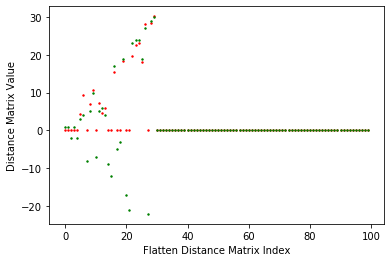

In [21]:
plt.scatter(range(X_train_results[train_show_index].shape[0]), X_train_results[train_show_index], c='r', s = 2)
plt.scatter(range(Y_train[train_show_index].shape[0]), Y_train[train_show_index], c='g', s = 2)
plt.xlabel ('Flatten Distance Matrix Index')
plt.ylabel ('Distance Matrix Value')

<function matplotlib.pyplot.show(*args, **kw)>

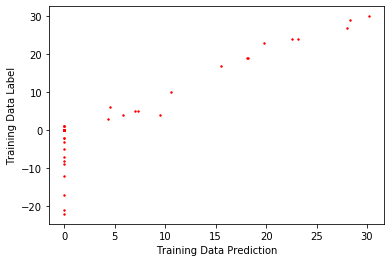

In [22]:
plt.scatter(X_train_results[train_show_index], Y_train[train_show_index], c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

In [25]:
X_train_results_resh= X_train_results.reshape((1, 424*100))
Y_train_resh = Y_train.reshape((1, 424*100))

<function matplotlib.pyplot.show(*args, **kw)>

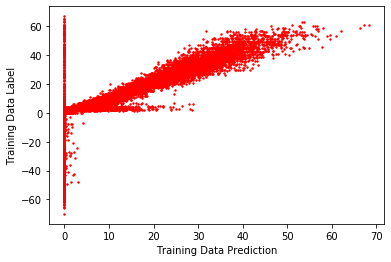

In [26]:
plt.scatter(X_train_results_resh, Y_train_resh, c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

## X_test plot

In [27]:
X_test_results = model.predict(X_test)

In [28]:
test_show_index = 10

Text(0, 0.5, 'Distance Matrix Value')

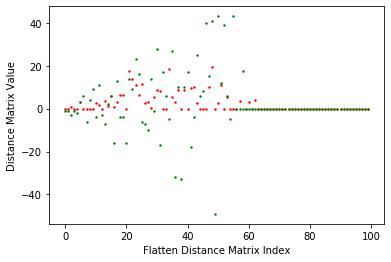

In [29]:
plt.scatter(range(X_test_results[test_show_index].shape[0]), X_test_results[test_show_index], c='r', s = 2)
plt.scatter(range(Y_test[test_show_index].shape[0]), Y_test[test_show_index], c='g', s = 2)
plt.xlabel ('Flatten Distance Matrix Index')
plt.ylabel ('Distance Matrix Value')

<function matplotlib.pyplot.show(*args, **kw)>

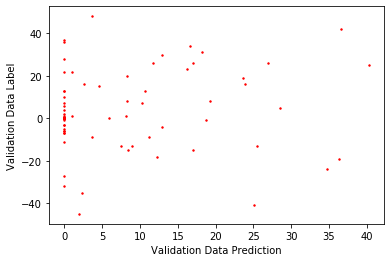

In [31]:
plt.scatter(X_test_results[train_show_index], Y_test[train_show_index], c='r', s = 2)
plt.xlabel ('Validation Data Prediction')
plt.ylabel ('Validation Data Label')
plt.show

In [32]:
X_test_results_resh= X_test_results.reshape((1, 75*100))
Y_test_resh = Y_test.reshape((1, 75*100))

<function matplotlib.pyplot.show(*args, **kw)>

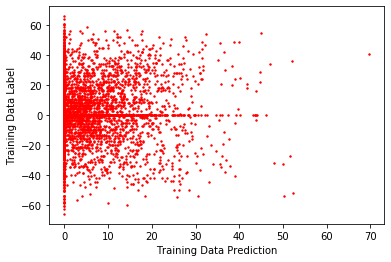

In [33]:
plt.scatter(X_test_results_resh, Y_test_resh, c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

## Plot Loss 

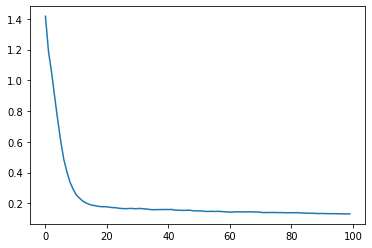

In [42]:
plt.plot(history.history['loss'])
plt.show()

## Plot RF distance

In [ ]:
for index in range(15):
    index_RF_dist = [each[index] for each in RF_list_distance_epoch]
    plt.plot(index_RF_dist)
    plt.xlabel ('Epochs Index')
    plt.ylabel ('RFR Distance')
    plt.show()

In [ ]:
plt.plot(RF_avg_distance_epoch)
plt.xlabel ('Epochs Index')
plt.ylabel ('RFR Distance')
plt.show()